In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sys

In [4]:
df = pd.read_csv('new_hps4.csv')
for index, row in df.iterrows():
    if row['state_metropolitan'] == 'metropolitan':
        df.at[index,'state_metropolitan'] = 1
    else:
        df.at[index,'state_metropolitan'] = 0
        
del df["teach_indivisualstudy"]
del df["Week"]
X = df.iloc[:,2:22]
y = df.iloc[:,-1] 





In [5]:
df

,States,UI_quarantined,UI_highrisk,state_metropolitan,Marital_Status,Food_Sufficency,Private_Health_insurance_status,Public_Health_insurance_status,anxiety,worry,...,Householdincome,teach_cancelled,teach_distance_online,teach_distance_paper,teach_others,teach_no.change,teach_livecontact,teach_studytime,Health_insurance,whether_study
0,1,1,0,1,3,3,1,2,4,4,...,2,1,1,0,0,0,1,1,1,0
1,1,1,0,1,1,1,1,2,3,3,...,6,1,1,0,0,0,1,1,1,1
2,1,1,0,1,1,1,1,2,2,1,...,4,1,1,0,0,0,4,2,1,1
3,1,1,0,1,1,1,1,2,2,2,...,5,0,1,1,0,0,3,1,1,1
4,1,1,0,1,3,2,1,1,1,1,...,4,0,1,0,0,0,3,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130298,56,1,0,1,3,2,1,1,2,2,...,1,0,0,0,0,1,4,3,1,0
130299,56,1,0,1,1,2,1,2,4,4,...,8,0,1,0,0,0,4,3,1,1
130300,56,1,0,1,1,2,1,2,3,2,...,5,0,0,0,0,1,4,4,1,0
130301,56,1,0,1,1,1,1,2,4,4,...,5,0,0,0,0,1,4,3,1,1


[0.03216107 0.02397631 0.07259628 0.07105088 0.02262281 0.04679843
 0.07273674 0.06817083 0.06529735 0.06904938 0.03350373 0.17517671
 0.02176747 0.01786548 0.01790717 0.00948277 0.01232651 0.0736979
 0.08589118 0.00792099]


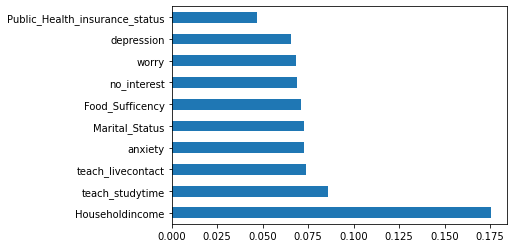

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [6]:
X = df[[ "Householdincome", "teach_studytime", "teach_livecontact", "anxiety", "worry", "Marital_Status", "Food_Sufficency", "no_interest","depression","Public_Health_insurance_status"]].to_numpy()
y = df[['whether_study']].to_numpy()
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier
tree_train_list = []
index = []
tree_test_list = []
for i in range(100):
    index.append(i+ 1)
    tree = DecisionTreeClassifier(max_depth=i + 1,class_weight = "balanced")
    tree.fit(X_train, y_train)
    tree_test_list.append(tree.score(X_test, y_test)) 
    tree_train_list.append(tree.score(X_train, y_train)) 

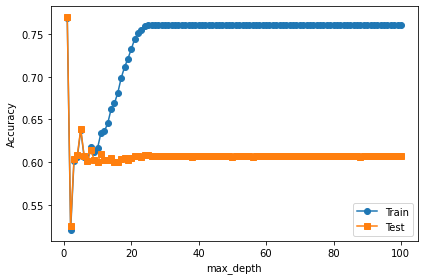

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
plt.plot(index, tree_train_list, marker='o', label='Train')
plt.plot(index, tree_test_list, marker='s', label='Test')
plt.legend(loc='best', numpoints=1)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.tight_layout()

In [19]:
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(random_state=123,class_weight = "balanced")

new_list = [None]
for i in range(20):
    new_list.append(i+1)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': new_list
}

gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params: %s' % gs.best_params_)
print('Test Accuracy: %.2f%%' % (gs.best_estimator_.score(X_test, y_test)*100))

Best Accuracy: 76.93%
Best Params: {'criterion': 'gini', 'max_depth': 1}
Test Accuracy: 76.99%


In [20]:
y_pred_tree = gs.best_estimator_.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
tree_conf = confusion_matrix(y_test, y_pred_tree)
print(tree_conf)
print(classification_report(y_test, y_pred_tree))


[[ 1738  6764]
 [ 2232 28357]]
              precision    recall  f1-score   support

           0       0.44      0.20      0.28      8502
           1       0.81      0.93      0.86     30589

    accuracy                           0.77     39091
   macro avg       0.62      0.57      0.57     39091
weighted avg       0.73      0.77      0.74     39091



In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, random_state=123, class_weight = "balanced" )



param_grid_forest = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 20, 50, 100, 150],
    'max_depth': [1, 10, 50, 100, 150]
}

gs_forest = GridSearchCV(estimator=forest,
                  param_grid=param_grid_forest,
                  scoring='accuracy',
                  cv=10)

gs_forest.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs_forest.best_score_*100))
print('Best Params: %s' % gs_forest.best_params_)
print('Test Accuracy: %.2f%%' % (gs_forest.best_estimator_.score(X_test, y_test)*100))

Best Accuracy: 75.45%
Best Params: {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 20}
Test Accuracy: 76.60%


In [17]:
y_pred_tree = gs_forest.best_estimator_.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
tree_conf = confusion_matrix(y_test, y_pred_tree)
print(tree_conf)
print(classification_report(y_test, y_pred_tree))


[[ 1817  6685]
 [ 2463 28126]]
              precision    recall  f1-score   support

           0       0.42      0.21      0.28      8502
           1       0.81      0.92      0.86     30589

    accuracy                           0.77     39091
   macro avg       0.62      0.57      0.57     39091
weighted avg       0.72      0.77      0.73     39091



In [9]:
from sklearn.linear_model import LogisticRegression

log_res = LogisticRegression(random_state=123, C = 0.001,class_weight = "balanced")

log_res.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_pred = log_res.predict(X_test)
print(mean_squared_error(y_test, y_pred))

print('Test Accuracy: %.2f%%' % (log_res.score(X_test, y_test)*100))

0.3633572945179197
Test Accuracy: 63.66%


In [28]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [29]:
clf = LinearSVC(random_state=0, tol=1e-3,class_weight = "balanced")
LinearSVC_model = clf.fit(X_train, y_train)
y_pred_clf = LinearSVC_model.predict(X_test)
accuracy_score(y_test, y_pred_clf)


/Users/jiayigao/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.6482054692896063

In [33]:

precision_score(y_test, y_pred_clf, average='weighted')


0.6869048130126812

In [34]:
f1_score(y_test, y_pred_clf, average='weighted')

0.6647629724807123

In [35]:
recall_score(y_test, y_pred_clf, average='weighted')

0.6482054692896063